In [2]:
!pip install -U gower
!pip install -U plotly


     ---------------------------------------- 9.9/9.9 MB 17.1 MB/s eta 0:00:00
     ------------------------------------- 430.8/430.8 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.9.0
    Uninstalling plotly-5.9.0:
      Successfully uninstalled plotly-5.9.0


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gower
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px

# Read in Data

In [8]:
mall_data = pd.read_csv("DATA/Mall_Customers.csv")
print(mall_data.columns.to_list())
mall_data = mall_data.rename(columns = {
    'CustomerID' : 'customer_id',
    'Gender' : 'gender',
    'Age' : 'age',
    'Annual Income (k$)' : 'annual_income',
    'Spending Score (1-100)' : 'spending_score'

})

mall_data.head()

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
mall_data.isnull().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [3]:
mall_data = mall_data.rename(columns = {
    'CustomerID' : 'customer_id',
    'Gender' : 'gender',
    'Age' : 'age',
    'Annual Income (k$)' : 'annual_income',
    'Spending Score (1-100)' : 'spending_score'

})

mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# EDA

In [10]:
# Summary Statistics
print(mall_data[['age' , 'annual_income' , 'spending_score']].describe())
print(mall_data['gender'].value_counts())

              age  annual_income  spending_score
count  200.000000     200.000000      200.000000
mean    38.850000      60.560000       50.200000
std     13.969007      26.264721       25.823522
min     18.000000      15.000000        1.000000
25%     28.750000      41.500000       34.750000
50%     36.000000      61.500000       50.000000
75%     49.000000      78.000000       73.000000
max     70.000000     137.000000       99.000000
Female    112
Male       88
Name: gender, dtype: int64


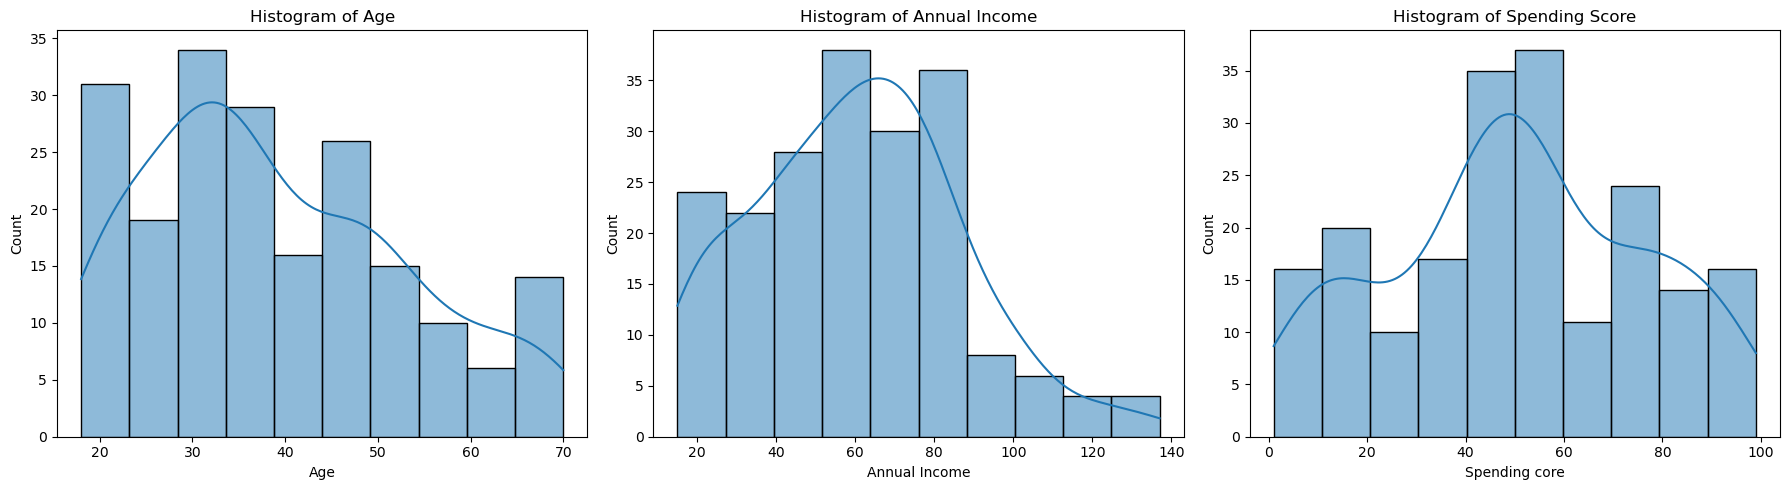

In [7]:
# Density Plots

fig, axes = plt.subplots(1 ,3 , figsize=(18,5))

sns.histplot(
    data = mall_data,
    x = 'age',
    kde = True,
    bins = 10,
    ax = axes[0]
)
axes[0].set_title('Histogram of Age')
axes[0].set_xlabel('Age')

sns.histplot(
    data = mall_data,
    x = 'annual_income',
    kde = True,
    bins = 10,
    ax = axes[1]
)
axes[1].set_title('Histogram of Annual Income')
axes[1].set_xlabel('Annual Income')

sns.histplot(
    data = mall_data,
    x = 'spending_score',
    kde = True,
    bins = 10,
    ax = axes[2]
)
axes[2].set_title('Histogram of Spending Score')
axes[2].set_xlabel('Spending core')

plt.tight_layout()
plt.show()

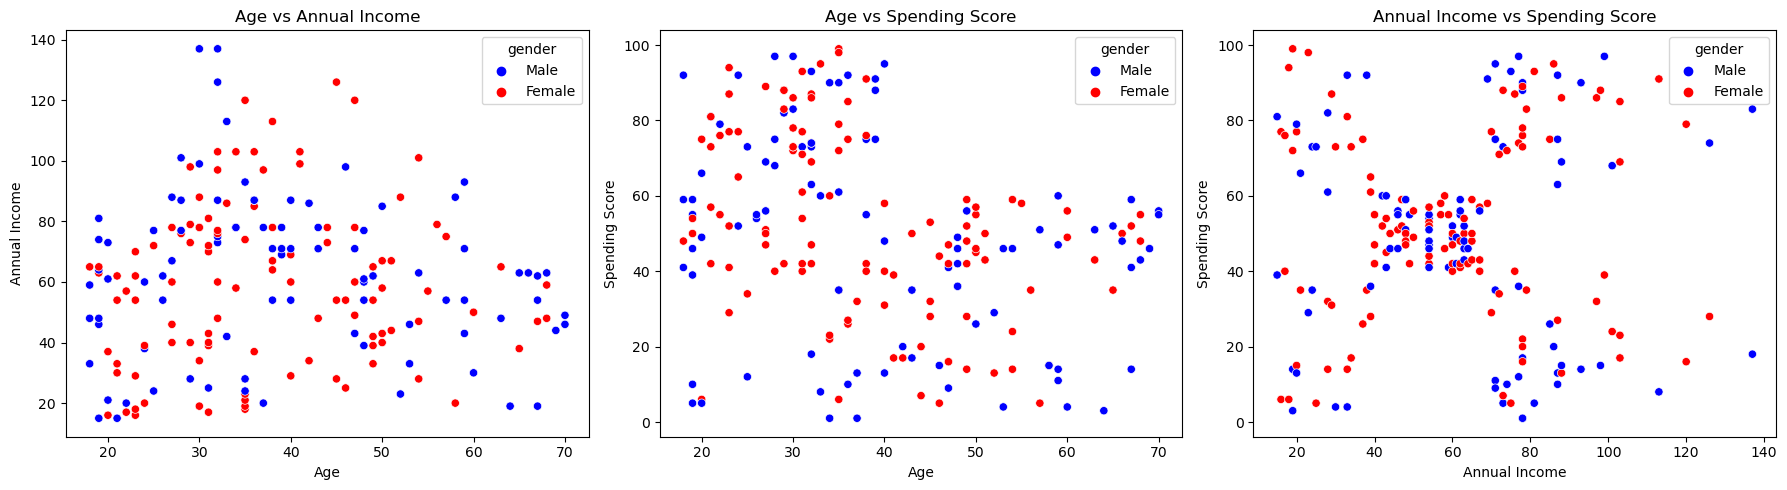

In [8]:
# Scatter Plots

import matplotlib.pyplot as plt
import seaborn as sns

palette = {'Male': 'blue', 'Female': 'red'}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))


sns.scatterplot(
    data=mall_data,
    x='age',
    y='annual_income',
    hue='gender',
    palette=palette,
    ax=axes[0]
)
axes[0].set_title('Age vs Annual Income')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Annual Income')

sns.scatterplot(
    data=mall_data,
    x='age',
    y='spending_score',
    hue='gender',
    palette=palette,
    ax=axes[1]
)
axes[1].set_title('Age vs Spending Score')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Spending Score')


sns.scatterplot(
    data=mall_data,
    x='annual_income',
    y='spending_score',
    hue='gender',
    palette=palette,
    ax=axes[2]
)
axes[2].set_title('Annual Income vs Spending Score')
axes[2].set_xlabel('Annual Income')
axes[2].set_ylabel('Spending Score')

plt.tight_layout()
plt.show()


 # Hierarchical Clustering

In [ ]:
mall_data = pd.read_csv("DATA/Mall_Customers.csv")

mall_data = mall_data.rename(columns={
    'CustomerID': 'customer_id',
    'Gender': 'gender',
    'Age' : 'age',
    'Annual Income (k$)': 'annual_income',
    'Spending Score (1-100)':'spending_score'
})


X = mall_data.drop(
    columns = ['customer_id'],
    axis = 1
)

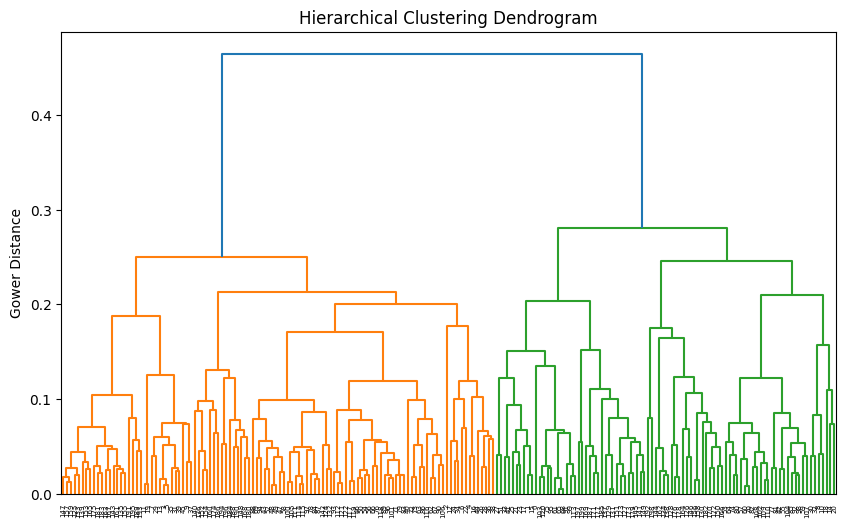

In [ ]:
# Gower Distance
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram

gower_dist = gower.gower_matrix(X)

gower_condensed = squareform(gower_dist)

Z = linkage(gower_condensed, method='average')

plt.figure(figsize=(10, 6))
dendrogram(Z, labels=mall_data.index, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Gower Distance')





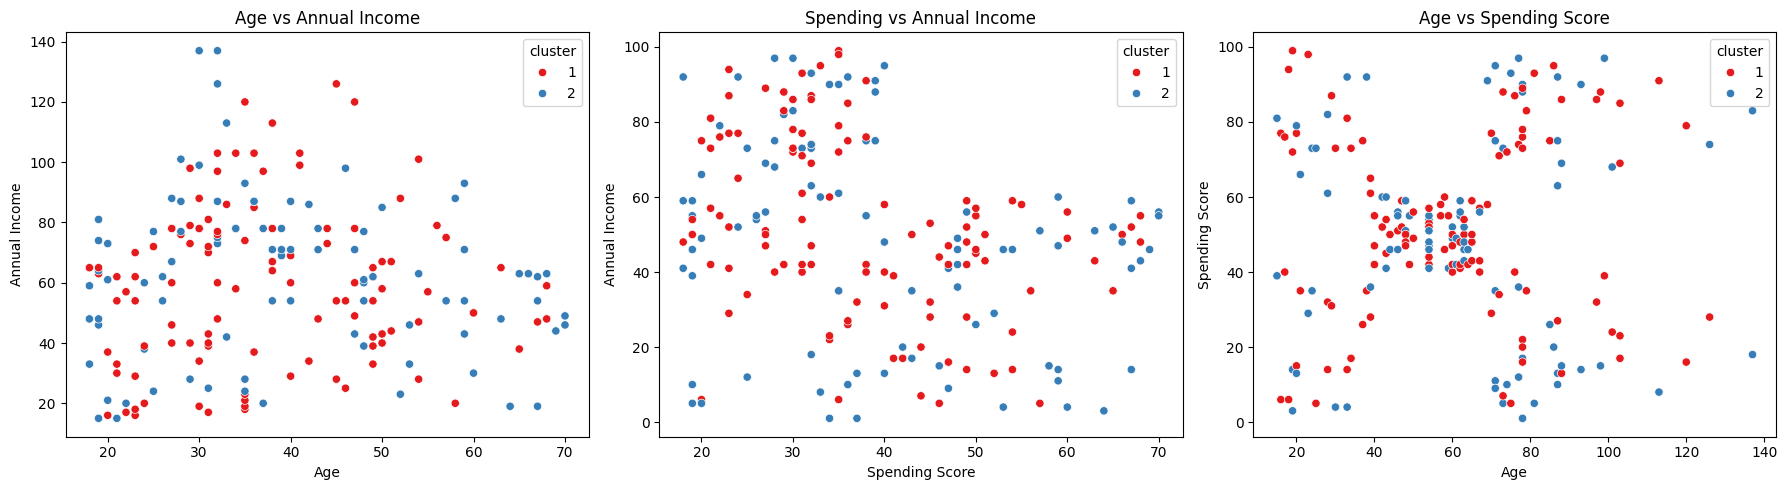

In [ ]:
# Hierarchical Clustering Results
clusters = fcluster(Z, 2, criterion='maxclust')
mall_data['cluster'] = clusters


palette = 'Set1'


fig, axes = plt.subplots(1, 3, figsize=(18, 5))


sns.scatterplot(
    data=mall_data,
    x='age',
    y='annual_income',
    hue='cluster',
    palette=palette,
    ax=axes[0]
)
axes[0].set_title('Age vs Annual Income')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Annual Income')


sns.scatterplot(
    data=mall_data,
    x='age',
    y='spending_score',
    hue='cluster',
    palette=palette,
    ax=axes[1]
)
axes[1].set_title('Spending vs Annual Income')
axes[1].set_xlabel('Spending Score')
axes[1].set_ylabel('Annual Income')


sns.scatterplot(
    data=mall_data,
    x='annual_income',
    y='spending_score',
    hue='cluster',
    palette=palette,
    ax=axes[2]
)
axes[2].set_title('Age vs Spending Score')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Spending Score')

plt.tight_layout()
plt.show()



# K Means Clustering

In [11]:
mall_data = pd.read_csv("DATA/Mall_Customers.csv")

mall_data = mall_data.rename(columns={
    'CustomerID': 'customer_id',
    'Gender': 'gender',
    'Age' : 'age',
    'Annual Income (k$)': 'annual_income',
    'Spending Score (1-100)':'spending_score'
})

C:\Users\jason\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


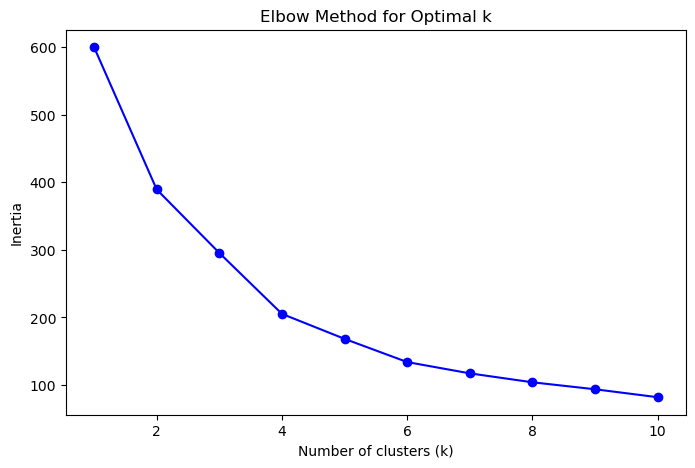

In [12]:



X = mall_data[['annual_income' , 'age' , 'spending_score']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


k = 5
kmeans = KMeans(n_clusters = k, random_state = 0)
mall_data['cluster'] = kmeans.fit_predict(X_scaled)
cluster_map = {
    0: 1,
    1: 2,
    2: 3,
    3: 4,
    4: 5
}
mall_data['cluster'] = mall_data['cluster'].map(cluster_map)





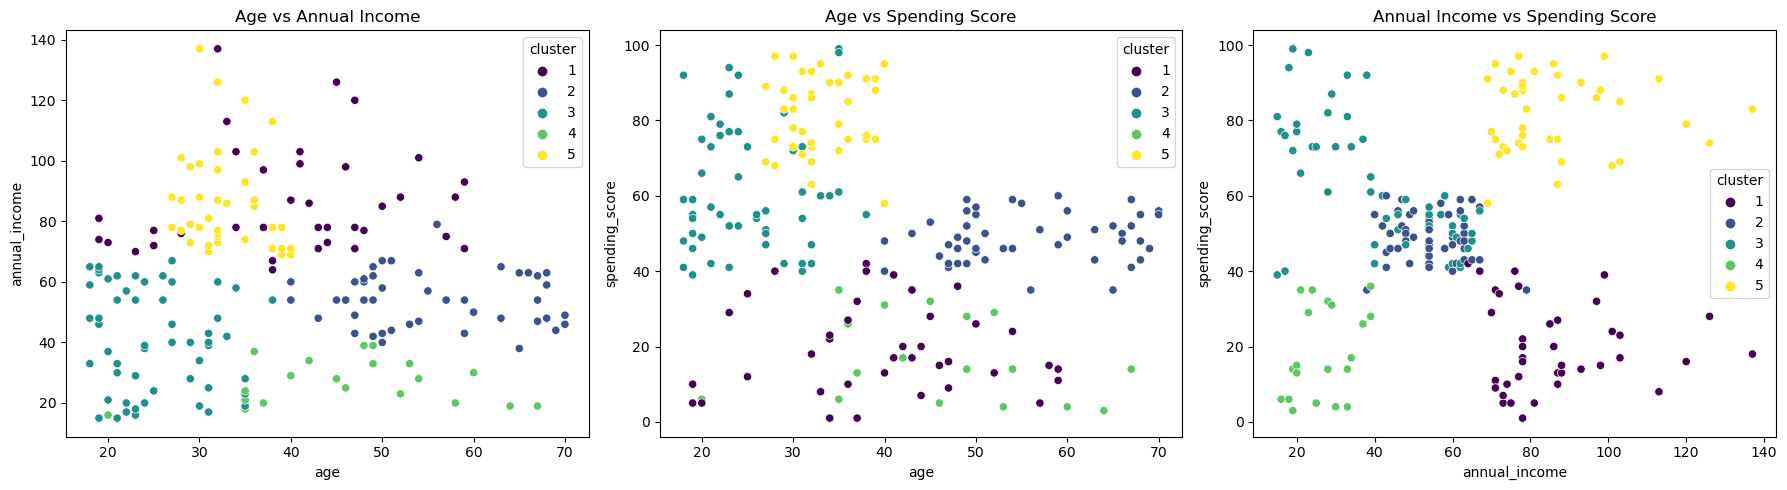

In [13]:
palette = [
    '#440154',  # dark purple
    '#3B528B',  # blue-purple
    '#21908C',  # teal
    '#5DC863',  # green
    '#FDE725'   # yellow
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns


sns.scatterplot(
    data = mall_data,
    x = 'age',
    y = 'annual_income',
    hue = 'cluster',
    palette = palette,
    ax = axes[0]
)
axes[0].set_title('Age vs Annual Income')


sns.scatterplot(
    data=mall_data,
    x='age',
    y='spending_score',
    hue='cluster',
    palette=palette,
    ax=axes[1]
)
axes[1].set_title('Age vs Spending Score')


sns.scatterplot(
    data=mall_data,
    x='annual_income',
    y='spending_score',
    hue='cluster',
    palette=palette,
    ax=axes[2]
)
axes[2].set_title('Annual Income vs Spending Score')

plt.tight_layout()
plt.show()

In [14]:
# 3-D Plot of Clusters
fig = px.scatter_3d(
    mall_data,
    x='age',
    y='annual_income',
    z='spending_score',
    color='cluster',
    color_continuous_scale='Viridis',
    symbol='cluster',
    hover_data=['age', 'annual_income', 'spending_score']
)

# Make the points smaller
fig.update_traces(marker=dict(size=2.5))  # default is usually ~6

fig.update_layout(
    title='Interactive 3D Scatterplot of Clusters',
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Annual Income',
        zaxis_title='Spending Score'
    )
)

fig.show()


C:\Users\jason\anaconda3\lib\site-packages\plotly\io\_renderers.py:51: UserWarning:

Plotly version >= 6 requires Jupyter Notebook >= 7 but you have 6.4.12 installed.
 To upgrade Jupyter Notebook, please run `pip install notebook --upgrade`.



In [ ]:
centroids_scaled = kmeans.cluster_centers_

# Convert back to original units
centroids_original = scaler.inverse_transform(centroids_scaled)

centroids_df = pd.DataFrame(
    centroids_original,
    columns=['annual_income', 'age', 'spending_score']
)

centroids_df.index = [1, 2, 3, 4, 5]
centroids_df.index.name = 'Cluster'
centroids_df = centroids_df[['age', 'spending_score', 'annual_income']]


print(centroids_df)

               age  spending_score  annual_income
Cluster                                          
1        55.638298       48.851064      54.382979
2        39.871795       19.358974      86.102564
3        32.875000       81.525000      86.100000
4        46.250000       18.350000      26.750000
5        25.185185       62.240741      41.092593




-   Average Shopper – Offer general promotions and loyalty programs to ensure customer retention and consistent shopping
- Wealthy but Reserved – Emphasize premium-quality stores and personalized
experiences, including upscale restaurant deals and exclusive promotions, rather than frequent sales.
- Luxury Spenders – Offer more aggressive marketing for high-end items, including premium brand promotions , designer fashion brands , upscale restaurants, and premium jewelry to maximize engagement and sales.
- Frugal by Necessity – Target this group with more aggressive discounts and value bundles to get large amounts of items for a discounted price.
- Young, Impulsive Spenders – Collaborate with social media term to run promotions online to spread awareness and increase sales, focusing on trendy items following



